In [2]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns


In [6]:
data = pd.read_csv("F:\\analysis_rfm_1010nooutlier.csv")

In [7]:
data.set_index('userid',inplace=True)

In [8]:
data.head()

,Unnamed: 0,restart_number,map_name,difficulty,win_loss_quit,round_reached,lives_left,player_rank,current_shards,current_gold,...,initial_nappopen,initial_ngames,initial_ndays,n_games,wlqgtr_cnt,active_days,platform,iphoneplayer,android,steam
userid,,,,,,,,,,,,,,,,,,,,,
NO_LINK02F380F1-7E3F-45E7-B017-5A4FE37EE339,0,0,map_Cyclops_Tears,Hard,Win,60,100,41,194,913,...,19,52,12,178,18,180,Android,0.0,1.0,0.0
NO_LINK038c0194ca0f1e0dbd0e48860dfd02e4,1,0,map_WinterIsComing_SnowPlains,Easy,Win,30,175,2,20,760,...,18,37,9,44,11,184,Android,0.0,1.0,0.0
NO_LINK03de89217dd2c340f47ee91ac083b1d2,2,0,map_Enchiridion_HotdogPrincessKingdom,Medium,Win,45,150,9,126,116,...,11,23,9,26,13,16,Android,0.0,1.0,0.0
NO_LINK066c43914fe0419e38f34042ef0ed7e9,3,0,map_PirateInPeril_UnderwaterChasm,Easy,Win,30,200,4,95,1652,...,1,2,1,12,3,122,Android,0.0,1.0,0.0
NO_LINK1ccb9958acfa54eb1b1024473fd9d593a7b5fc6b,4,0,map_WinterIsComing_SnowPlains,Medium,Quit,0,150,10,170,81,...,3,14,2,36,6,99,Android,0.0,1.0,0.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4534726 entries, NO_LINK02F380F1-7E3F-45E7-B017-5A4FE37EE339 to 590f505e682b081e0a6e250f
Data columns (total 41 columns):
Unnamed: 0                  int64
restart_number              int64
map_name                    object
difficulty                  object
win_loss_quit               object
round_reached               int64
lives_left                  int64
player_rank                 int64
current_shards              int64
current_gold                int64
current_gems                int64
recency_in_days             int64
recency_in_weeks            int64
active_status               object
countofdays                 int64
frequency_in_total          int64
app_opened_perday_median    float64
avg_duration_mins           float64
win_count                   int64
loss_count                  int64
restart_count               int64
quit_count                  int64
gameoverrestart_count       int64
terminated_count            int64
difficult

In [10]:
recency_labels = range(5, 0, -1)
frequency_labels = range(1, 6)

recency_groups = pd.qcut(data['recency_in_days'], q=5, labels=recency_labels)
frequency_groups = pd.qcut(data['app_opened_perday_median'].rank(method='first'), q=5, labels=frequency_labels)

data = data.assign(R=recency_groups.values, F=frequency_groups.values)
intensity_labels = range(1, 6)
intensity_groups = pd.qcut(data['avg_duration_mins'], q=5, labels=intensity_labels)


In [12]:

data = data.assign(M=intensity_groups)

data['RFM_Score'] = data[['R','F','M']].sum(axis=1)

print(data.head())



                                                 Unnamed: 0  restart_number  \
userid                                                                        
NO_LINK02F380F1-7E3F-45E7-B017-5A4FE37EE339               0               0   
NO_LINK038c0194ca0f1e0dbd0e48860dfd02e4                   1               0   
NO_LINK03de89217dd2c340f47ee91ac083b1d2                   2               0   
NO_LINK066c43914fe0419e38f34042ef0ed7e9                   3               0   
NO_LINK1ccb9958acfa54eb1b1024473fd9d593a7b5fc6b           4               0   

                                                                              map_name  \
userid                                                                                   
NO_LINK02F380F1-7E3F-45E7-B017-5A4FE37EE339                          map_Cyclops_Tears   
NO_LINK038c0194ca0f1e0dbd0e48860dfd02e4                  map_WinterIsComing_SnowPlains   
NO_LINK03de89217dd2c340f47ee91ac083b1d2          map_Enchiridion_HotdogPrincessKingdom

In [13]:
def rfm_level(df):
    if df['RFM_Score'] >= 14:
        return 'Platinum Plus'
    elif ((df['RFM_Score'] >= 11) and (df['RFM_Score'] < 14)):
        return 'Platinum'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 11)):
        return 'Gold'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 8)):
        return 'Silver'
    else:
        return 'Bronze'


In [15]:
data['RFM_Level'] = data.apply(rfm_level, axis=1)

In [16]:

rfm_level_agg = data.groupby('RFM_Level').agg({
    'recency_in_days': 'mean',
    'app_opened_perday_median': 'mean',
    'avg_duration_mins': ['mean', 'count']
}).round(1)
print("Printing RFM level aggregation");


Printing RFM level aggregation


In [17]:

data_rfm = data[['recency_in_days', 'app_opened_perday_median', 'avg_duration_mins']]



In [18]:

data_log = np.log(data_rfm)
scaler = StandardScaler()
scaler.fit(data_log)
data_normalized = scaler.transform(data_log)
data_normalized = pd.DataFrame(data=data_normalized, index=data_rfm.index, columns=data_rfm.columns)


3

4



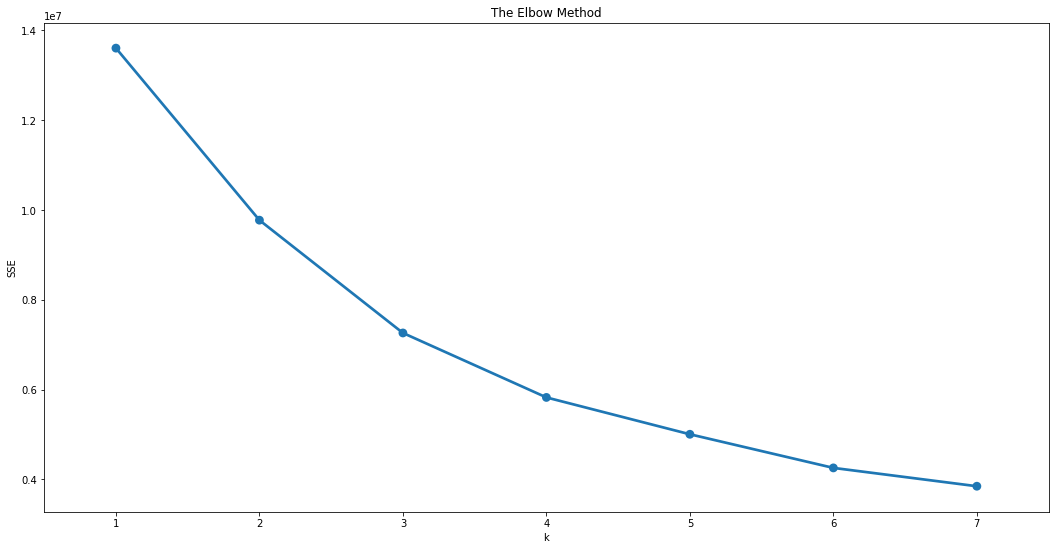

In [12]:

data_rfm = data_normalized[['recency_in_days', 'app_opened_perday_median', 'avg_duration_mins']]
data_normalized = pd.DataFrame(data=data_normalized, index=data_rfm.index, columns=data_rfm.columns)
print("3\n")
sse = {}
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_normalized)
    sse[k] = kmeans.inertia_
plt.figure(figsize=(18,9))
print("4\n")
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()


In [19]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(data_normalized)
cluster_labels = kmeans.labels_
data_rfm_k4 = data_rfm.assign(Cluster=cluster_labels)
grouped = data_rfm_k4.groupby(['Cluster'])

print (grouped.agg({
    'recency_in_days': 'mean',
    'app_opened_perday_median': 'mean',
    'avg_duration_mins': ['mean', 'count']
  }).round(1))
print ("grouped Done")

        recency_in_days app_opened_perday_median avg_duration_mins         
                   mean                     mean              mean    count
Cluster                                                                    
0                 312.3                      1.9               5.5  1755205
1                  53.2                      3.5               9.4   804077
2                 301.8                      5.9               9.8  1780190
3                 293.7                      3.4            3375.1   195254
grouped Done


In [21]:
data_melt = pd.melt(
                    data_rfm_k4.reset_index(),
                    id_vars=['userid', 'Cluster'],
                    value_vars=['recency_in_days', 'app_opened_perday_median', 'avg_duration_mins'],
                    var_name='metric', value_name='value'
                    )
print(data_melt.head(10))

                                            userid  Cluster           metric  \
0      NO_LINK02F380F1-7E3F-45E7-B017-5A4FE37EE339        0  recency_in_days   
1          NO_LINK038c0194ca0f1e0dbd0e48860dfd02e4        1  recency_in_days   
2          NO_LINK03de89217dd2c340f47ee91ac083b1d2        1  recency_in_days   
3          NO_LINK066c43914fe0419e38f34042ef0ed7e9        1  recency_in_days   
4  NO_LINK1ccb9958acfa54eb1b1024473fd9d593a7b5fc6b        1  recency_in_days   
5          NO_LINK2251a92a04d81d9bb3ee3fe55a4c0177        1  recency_in_days   
6          NO_LINK02dac3b4938fee587f8a83e001db6e6a        1  recency_in_days   
7          NO_LINK2879d106f2186e84fff8cb7926e4ce45        1  recency_in_days   
8      NO_LINK06F6B956-6FA3-4949-B7C3-5E43BA2D34BC        1  recency_in_days   
9          NO_LINK0c71260113eaad2d510d2de301e83bd6        1  recency_in_days   

   value  
0  220.0  
1    4.0  
2   19.0  
3   15.0  
4    5.0  
5    4.0  
6   11.0  
7   13.0  
8   14.0  
9    1.0 

In [22]:
data_melt.to_csv("F:\\data_melt.csv")

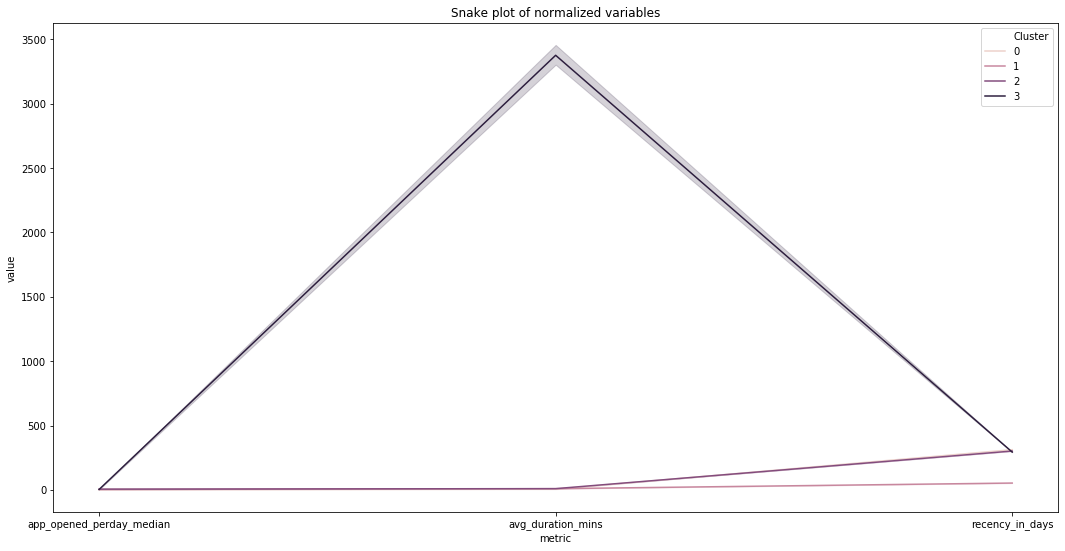

In [23]:

plt.figure(figsize = (18,9))
plt.title('Snake plot of normalized variables')
plt.xlabel('Metric')
plt.ylabel('Value')
sns.lineplot(data=data_melt, x='metric', y='value', hue='Cluster')
plt.show()


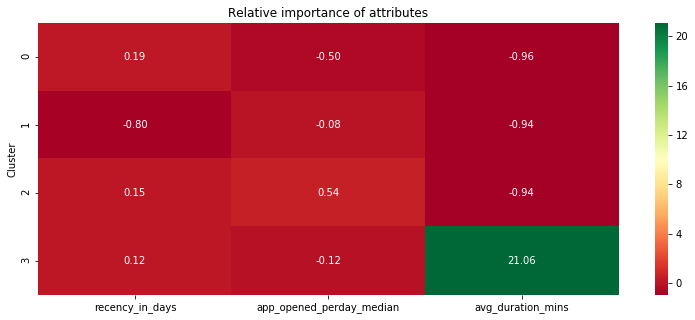

In [24]:
cluster_avg = data_rfm_k4.groupby(['Cluster']).mean()
population_avg = data_rfm.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

plt.figure(figsize=(13, 5))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')


In [25]:
relative_imp.style.background_gradient(cmap='RdYlGn',axis=1)


,recency_in_days,app_opened_perday_median,avg_duration_mins
Cluster,,,
0,0.194502,-0.502105,-0.963968
1,-0.796463,-0.0805901,-0.938284
2,0.154466,0.544196,-0.935873
3,0.123164,-0.116132,21.062


In [26]:
import pandas as pd

In [4]:
data=pd.read_csv("F:\\data_melt.csv")

In [6]:
data = data.drop(columns="Unnamed: 0")


In [7]:
data.head()

,userid,Cluster,metric,value
0,NO_LINK02F380F1-7E3F-45E7-B017-5A4FE37EE339,1,recency_in_days,0.097309
1,NO_LINK038c0194ca0f1e0dbd0e48860dfd02e4,0,recency_in_days,-4.165497
2,NO_LINK03de89217dd2c340f47ee91ac083b1d2,2,recency_in_days,-2.508019
3,NO_LINK066c43914fe0419e38f34042ef0ed7e9,2,recency_in_days,-2.759478
4,NO_LINK1ccb9958acfa54eb1b1024473fd9d593a7b5fc6b,2,recency_in_days,-3.928128


In [15]:
rfm = data.pivot_table(index=['userid','Cluster'], columns='metric',
                     values='value', aggfunc='first').reset_index()


In [16]:
rfm.head()

metric,userid,Cluster,avg_duration_mins,frequency_in_total,recency_in_days
0,5406ceb7eff6145a1a5d347a,1,1.275416,3.039569,-1.199660
1,5406e882eff6145a1a5d3488,2,0.042974,4.004941,-3.302869
2,5436fbffd315b01a0f40aa9f,0,2.920662,1.580140,-1.267222
3,5437b5bf628b54036528af52,1,-0.093414,1.522981,-1.090861
4,5437bd7b628b54036528af5a,3,-0.119640,-0.921807,0.600293


In [17]:
data = pd.read_csv("C:\\Users\\Subasri\Desktop\\analysis_rfm_1010nooutlier.csv")

In [18]:
df=pd.merge(data, rfm, on='userid')

In [20]:
df = df.drop(columns="Unnamed: 0")


In [21]:
df.head()

,userid,restart_number,map_name,difficulty,win_loss_quit,round_reached,lives_left,player_rank,current_shards,current_gold,...,wlqgtr_cnt,active_days,platform,iphoneplayer,android,steam,Cluster,avg_duration_mins_y,frequency_in_total_y,recency_in_days_y
0,NO_LINK02F380F1-7E3F-45E7-B017-5A4FE37EE339,0,map_Cyclops_Tears,Hard,Win,60,100,41,194,913,...,18,180,Android,0.0,1.0,0.0,1,0.636637,2.746963,0.097309
1,NO_LINK038c0194ca0f1e0dbd0e48860dfd02e4,0,map_WinterIsComing_SnowPlains,Easy,Win,30,175,2,20,760,...,11,184,Android,0.0,1.0,0.0,0,3.479516,1.803744,-4.165497
2,NO_LINK03de89217dd2c340f47ee91ac083b1d2,0,map_Enchiridion_HotdogPrincessKingdom,Medium,Win,45,150,9,126,116,...,13,16,Android,0.0,1.0,0.0,2,0.838895,1.580140,-2.508019
3,NO_LINK066c43914fe0419e38f34042ef0ed7e9,0,map_PirateInPeril_UnderwaterChasm,Easy,Win,30,200,4,95,1652,...,3,122,Android,0.0,1.0,0.0,2,0.055394,0.528476,-2.759478
4,NO_LINK1ccb9958acfa54eb1b1024473fd9d593a7b5fc6b,0,map_WinterIsComing_SnowPlains,Medium,Quit,0,150,10,170,81,...,6,99,Android,0.0,1.0,0.0,2,-0.077000,1.461476,-3.928128


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534726 entries, 0 to 4534725
Data columns (total 45 columns):
userid                      object
restart_number              int64
map_name                    object
difficulty                  object
win_loss_quit               object
round_reached               int64
lives_left                  int64
player_rank                 int64
current_shards              int64
current_gold                int64
current_gems                int64
recency_in_days_x           int64
recency_in_weeks            int64
active_status               object
countofdays                 int64
frequency_in_total_x        int64
app_opened_perday_median    float64
avg_duration_mins_x         float64
win_count                   int64
loss_count                  int64
restart_count               int64
quit_count                  int64
gameoverrestart_count       int64
terminated_count            int64
difficulty_skull            int64
easy_count                  

In [22]:
df.to_csv("F:\\analysis_rfm_1010nooutlier_data_unstack")